In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
BOP = pd.read_csv(r"C:\Users\pc\Desktop\KAIM10X\Week-10-KAIM-10X\Data\BrentOilPrices.csv")
BOP.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


# Check the data types and missing values

In [5]:

print("\nData types and missing values:")
print(BOP.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None


# Summary statistics

In [6]:

print("\nSummary statistics:")
print(BOP.describe())


Summary statistics:
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


# Plotting the price over time

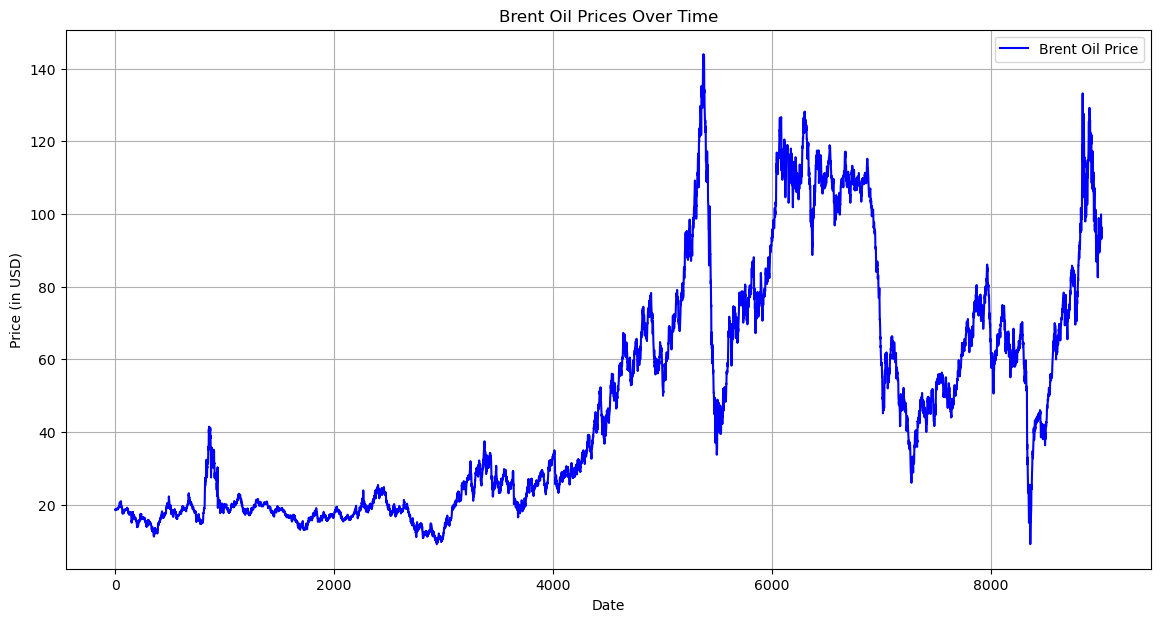

In [7]:

plt.figure(figsize=(14, 7))
plt.plot(BOP['Price'], label='Brent Oil Price', color='b')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.grid()
plt.show()

# Date' to datetime

In [11]:
BOP['Date'] = pd.to_datetime(BOP['Date'])

# Set the date as the index

In [13]:

BOP.set_index('Date', inplace=True)

# Resampling to monthly average

In [16]:

monthly_avg = BOP['Price'].resample('M').mean()
print(monthly_avg )

Date
1987-05-31     18.580000
1987-06-30     18.860476
1987-07-31     19.856522
1987-08-31     18.979524
1987-09-30     18.313182
                 ...    
2022-07-31    111.925714
2022-08-31    100.446364
2022-09-30     89.764762
2022-10-31     93.331905
2022-11-30     95.999000
Freq: ME, Name: Price, Length: 427, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_24180\872309792.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = BOP['Price'].resample('M').mean()
